In [35]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, UpSampling1D, LSTM, Input, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Reshape, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from scipy.fft import fft, ifft
from tensorflow.keras.callbacks import ModelCheckpoint



# 파일 불려오기

In [16]:
# Training
file_names = [
    'out_training.csv',
    'in_training.csv',
    'noise_training.csv',
    'other_training.csv',
    'normal_training.csv'
]

search_root = '' # 경로에 맞게 변경

file_paths = {}

for root, dirs, files in os.walk(search_root):
    for file_name in file_names:
        if file_name in files:
            file_paths[file_name] = os.path.join(root, file_name)

# 파일을 찾았는지 확인하고, 데이터 읽기
data_frames = {}
for file_name in file_names:
    if file_name in file_paths:
        data_frames[file_name] = pd.read_csv(file_paths[file_name])
        print(f"{file_name} 파일을 성공적으로 불러왔습니다: {file_paths[file_name]}")
    else:
        print(f"파일을 찾을 수 없습니다: {file_name}")

# DataFrames 변수로 저장
df1 = data_frames.get('out_training.csv')
df2 = data_frames.get('in_training.csv')
df3 = data_frames.get('noise_training.csv')
df4 = data_frames.get('other_training.csv')
df5 = data_frames.get('normal_training.csv')

out_training.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Training/누수감지데이터셋(Training)/out_training.csv
in_training.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Training/누수감지데이터셋(Training)/in_training.csv
noise_training.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Training/누수감지데이터셋(Training)/noise_training.csv
other_training.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Training/누수감지데이터셋(Training)/other_training.csv
normal_training.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Training/누수감지데이터셋(Training)/normal_training.csv


In [23]:
file_names = [
    'out_validation.csv',
    'in_validation.csv',
    'noise_validation.csv',
    'other_validation.csv',
    'normal_validation.csv'
]

search_root = '' # 경로에 맞게 변경

# 파일경로 저장
file_paths = {}

for root, dirs, files in os.walk(search_root):
    for file_name in file_names:
        if file_name in files:
            file_paths[file_name] = os.path.join(root, file_name)

# 파일을 찾았는지 확인하고, 데이터 읽기
v_data_frames = {}
for file_name in file_names:
    if file_name in file_paths:
        data_frames[file_name] = pd.read_csv(file_paths[file_name])
        print(f"{file_name} 파일을 성공적으로 불러왔습니다: {file_paths[file_name]}")
    else:
        print(f"파일을 찾을 수 없습니다: {file_name}")

# DataFrames 변수로 저장
dfv1 = data_frames.get('out_validation.csv')
dfv2 = data_frames.get('in_validation.csv')
dfv3 = data_frames.get('noise_validation.csv')
dfv4 = data_frames.get('other_validation.csv')
dfv5 = data_frames.get('normal_validation.csv')

out_validation.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Validation/누수감지데이터셋(Validation)/out_validation.csv
in_validation.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Validation/누수감지데이터셋(Validation)/in_validation.csv
noise_validation.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Validation/누수감지데이터셋(Validation)/noise_validation.csv
other_validation.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Validation/누수감지데이터셋(Validation)/other_validation.csv
normal_validation.csv 파일을 성공적으로 불러왔습니다: /Users/seonukim/Documents/ESDL/ETRI_데이터/AI_hub_data/Validation/누수감지데이터셋(Validation)/normal_validation.csv


# 전처리

In [19]:
scaler = MinMaxScaler()
df1['freq'] = df1.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)
df2['freq'] = df2.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)
df3['freq'] = df3.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)
df4['freq'] = df4.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)
df5['freq'] = df5.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)


In [25]:
dfv1['freq'] = dfv1.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)
dfv2['freq'] = dfv2.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)
dfv3['freq'] = dfv3.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)
dfv4['freq'] = dfv4.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)
dfv5['freq'] = dfv5.loc[:, '10HZ':'5120HZ'].apply(lambda row: scaler.fit_transform(row.values.reshape(-1, 1)).flatten().tolist(), axis=1)

# Outlier 생성

In [27]:
# normal 타입에서 outlier, out타입에서 정상데이터 추출
freq_data = np.array(df5['freq'].tolist())

freq_data_out = np.array(df1['freq'].tolist())

iso_forest = IsolationForest(contamination=0.01)# 이상치 비율 가정
preds = iso_forest.fit_predict(freq_data.reshape(len(freq_data), -1))
outliers = preds == -1

preds_out = iso_forest.fit_predict(freq_data_out.reshape(len(freq_data_out), -1))
normal_out = preds_out == 1

is_outlier = np.where(outliers)[0]
outlier_data = freq_data[is_outlier]

normal_out = np.where(normal_out)[0]
out_normal = freq_data_out[normal_out]

data = np.vstack([out_normal, outlier_data])  # 데이터 합치기
labels = np.array([1] * 17363 + [-1] * 198) # 17363개의 정상데이터, 198개의 outlier

# 1D CNN Autoencoder

In [28]:
input_dim = 512  # 입력 벡터의 차원

# 인코더 정의
input_layer = Input(shape=(input_dim, 1))  # 입력 데이터 차원에 채널 차원 추가
x = Conv1D(32, 3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(16, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

# 디코더 정의
x = Conv1D(16, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(32, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
decoded = Conv1D(1, 3, activation='sigmoid', padding='same')(x)  # 출력 차원을 입력과 동일하게 1로 설정

# 오토인코더 모델 생성
autoencoder_1d = Model(input_layer, decoded)
autoencoder_1d.compile(optimizer='adam', loss='mean_squared_error')




2024-07-08 09:32:32.469932: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-07-08 09:32:32.470057: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-07-08 09:32:32.470074: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-07-08 09:32:32.470610: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-08 09:32:32.471058: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
autoencoder_1d.fit(data, data, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])
autoencoder_1d.load_weights('best_model.h5')

Epoch 1/50
439/439 [==============================] - 17s 38ms/step - loss: 3.3205e-04 - val_loss: 2.7717e-04
Epoch 2/50
439/439 [==============================] - 14s 31ms/step - loss: 2.1282e-04 - val_loss: 1.9954e-04
Epoch 3/50
439/439 [==============================] - 14s 31ms/step - loss: 1.5623e-04 - val_loss: 1.5852e-04
Epoch 4/50
439/439 [==============================] - 14s 31ms/step - loss: 1.2431e-04 - val_loss: 1.3688e-04
Epoch 5/50
439/439 [==============================] - 14s 31ms/step - loss: 1.0561e-04 - val_loss: 1.2025e-04
Epoch 6/50
439/439 [==============================] - 14s 33ms/step - loss: 9.5491e-05 - val_loss: 1.1110e-04
Epoch 7/50
439/439 [==============================] - 14s 31ms/step - loss: 8.8577e-05 - val_loss: 1.0956e-04
Epoch 8/50
439/439 [==============================] - 14s 33ms/step - loss: 8.3450e-05 - val_loss: 1.0273e-04
Epoch 9/50
439/439 [==============================] - 15s 33ms/step - loss: 7.9133e-05 - val_loss: 9.6111e-05
Epoch 10/5

In [33]:
reconstructed = autoencoder_1d.predict(data)
reconstructed = reconstructed.squeeze()
mse = np.mean(np.power(data - reconstructed, 2), axis=1)
threshold = np.quantile(mse, 0.99) 
preds = np.where(mse > threshold, -1, 1)


549/549 [==============================] - 5s 10ms/step


Accuracy: 0.9878


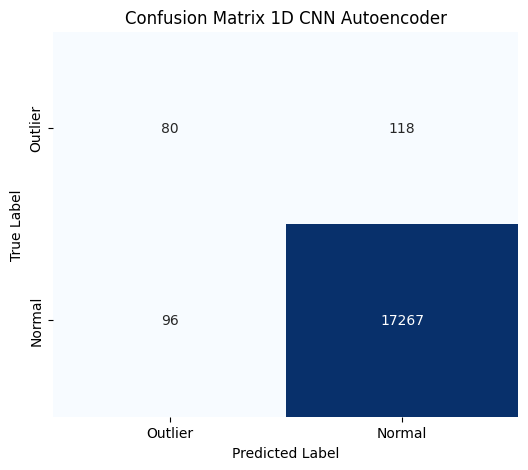

In [34]:
conf_matrix = confusion_matrix(labels, preds)
accuracy = accuracy_score(labels, preds)

print(f'Accuracy: {accuracy:.4f}')
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Outlier', 'Normal'], yticklabels=['Outlier', 'Normal'])
plt.title('Confusion Matrix 1D CNN Autoencoder')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2D CNN Autoencoder

In [36]:
# 입력 벡터 크기
input_shape = (512,)

# 입력 레이어
input_layer = Input(shape=input_shape)

# 입력 데이터를 16x32 형태로 변형
x = Reshape((16, 32, 1))(input_layer)  # 채널 차원 추가

# 인코더: Conv2D와 MaxPooling2D 레이어 사용
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# 디코더: Conv2DTranspose 또는 UpSampling2D와 Conv2D 레이어 사용
x = Conv2DTranspose(16, (3, 3), strides=2, activation='relu', padding='same')(encoded)
x = Conv2DTranspose(32, (3, 3), strides=2, activation='relu', padding='same')(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# 출력 데이터를 원래 벡터 크기로 재구성
decoded = Reshape(input_shape)(decoded)

# 모델 생성
autoencoder_2d = Model(input_layer, decoded)
autoencoder_2d.compile(optimizer='adam', loss='mean_squared_error')

# 모델 요약 출력
autoencoder_2d.summary()

autoencoder_2d.compile(optimizer='adam', loss='mean_squared_error')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 reshape (Reshape)           (None, 16, 32, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 16, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 8, 16, 32)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 16, 16)         4624      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 8, 16)          0         
 g2D)                                                      

In [37]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
autoencoder_2d.fit(data, data, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])
autoencoder_2d.load_weights('best_model.h5')

Epoch 1/50


2024-07-08 09:55:18.676566: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


431/439 [============================>.] - ETA: 0s - loss: 0.0164

2024-07-08 09:55:21.174461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 3s 6ms/step - loss: 0.0162 - val_loss: 0.0054
Epoch 2/50
 32/439 [=>............................] - ETA: 2s - loss: 0.0040

/Users/seonukim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


439/439 [==============================] - 2s 6ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 3/50
439/439 [==============================] - 2s 6ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 4/50
439/439 [==============================] - 2s 6ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/50
439/439 [==============================] - 3s 7ms/step - loss: 6.0507e-04 - val_loss: 7.8107e-04
Epoch 6/50
439/439 [==============================] - 3s 7ms/step - loss: 4.7612e-04 - val_loss: 6.3929e-04
Epoch 7/50
439/439 [==============================] - 3s 6ms/step - loss: 3.8595e-04 - val_loss: 5.3698e-04
Epoch 8/50
439/439 [==============================] - 2s 6ms/step - loss: 3.2308e-04 - val_loss: 4.5665e-04
Epoch 9/50
439/439 [==============================] - 3s 6ms/step - loss: 2.8459e-04 - val_loss: 4.1127e-04
Epoch 10/50
439/439 [==============================] - 3s 7ms/step - loss: 2.5710e-04 - val_loss: 3.9038e-04
Epoch 11/50
439/439 [==============================] - 3s 6ms/

In [53]:
reconstructed = autoencoder_2d.predict(data)
mse_2d = np.mean(np.power(data - reconstructed, 2), axis=1)
threshold = np.quantile(mse, 0.99) 
preds = np.where(mse > threshold, -1, 1)

549/549 [==============================] - 1s 2ms/step


Accuracy: 0.9940


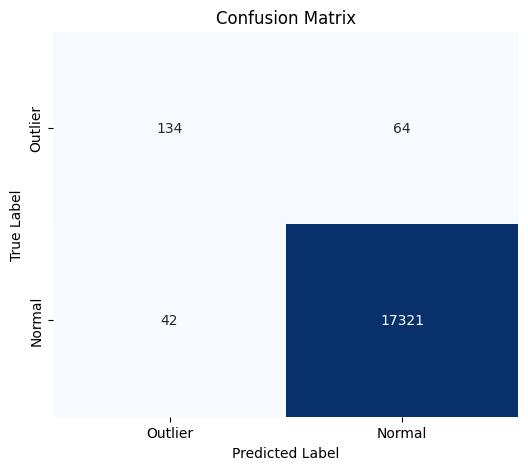

In [39]:
conf_matrix = confusion_matrix(labels, preds)
accuracy = accuracy_score(labels, preds)

print(f'Accuracy: {accuracy:.4f}')
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Outlier', 'Normal'], yticklabels=['Outlier', 'Normal'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# isolation forrest

In [40]:
# Isolation Forest 모델 생성 및 예측
iso_forest = IsolationForest(contamination=0.01)  # 이상치 비율 가정
preds = iso_forest.fit_predict(data)

# 실제 이상치(-1)와 정상(1) 데이터 레이블과 비교
accuracy = accuracy_score(labels, preds)
conf_matrix = confusion_matrix(labels, preds)

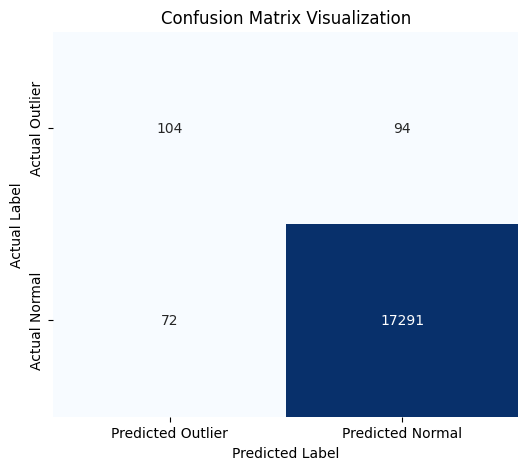

In [41]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Outlier', 'Predicted Normal'],
            yticklabels=['Actual Outlier', 'Actual Normal'])
plt.title('Confusion Matrix Visualization')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Fully connected layer Autoencoder

In [42]:
input_dim = freq_data.shape[1]  # 입력 데이터의 특성 수

# 모델 구성
input_layer = Input(shape=(input_dim,))
# 인코더
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
# 디코더
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# 오토인코더 모델 생성
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
autoencoder.fit(data, data, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])
autoencoder.load_weights('best_model.h5')


Epoch 1/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 2/50
 45/439 [==>...........................] - ETA: 1s - loss: 0.0060

/Users/seonukim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


439/439 [==============================] - 2s 4ms/step - loss: 0.0066 - val_loss: 0.0079
Epoch 3/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0065 - val_loss: 0.0079
Epoch 4/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0066 - val_loss: 0.0079
Epoch 5/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0066 - val_loss: 0.0081
Epoch 6/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0065 - val_loss: 0.0079
Epoch 7/50
439/439 [==============================] - 2s 5ms/step - loss: 0.0064 - val_loss: 0.0080
Epoch 8/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0065 - val_loss: 0.0079
Epoch 9/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0064 - val_loss: 0.0080
Epoch 10/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0066 - val_loss: 0.0081
Epoch 11/50
439/439 [==============================] - 2s 4ms/step - loss: 0.0067 - val_loss: 0.0080
Epoch 12/

In [50]:
reconstructed = autoencoder.predict(data)
mse = np.mean(np.power(data - reconstructed, 2), axis=1)
threshold = np.quantile(mse, 0.99) 
preds = np.where(mse > threshold, -1, 1)


549/549 [==============================] - 1s 1ms/step


Accuracy: 0.9870


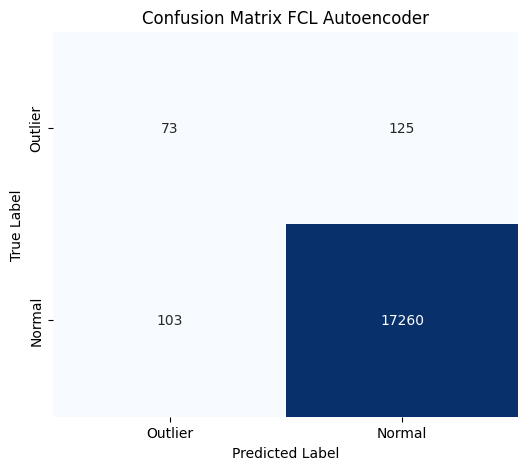

In [52]:
conf_matrix = confusion_matrix(labels, preds)
accuracy = accuracy_score(labels, preds)

print(f'Accuracy: {accuracy:.4f}')
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Outlier', 'Normal'], yticklabels=['Outlier', 'Normal'])
plt.title('Confusion Matrix FCL Autoencoder')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2D CNN Autoencoder outlier visualization

In [64]:
freq_data_out = np.array(df1['freq'].tolist())

In [65]:
checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')
autoencoder_2d.fit(freq_data_out, freq_data_out, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])
autoencoder_2d.load_weights('best_model.h5')

Epoch 1/50


2024-07-08 10:18:26.013451: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


439/439 [==============================] - 4s 7ms/step - loss: 1.0155e-04 - val_loss: 1.0183e-04
Epoch 2/50
 19/439 [>.............................] - ETA: 2s - loss: 9.6259e-05

/Users/seonukim/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


439/439 [==============================] - 3s 7ms/step - loss: 9.7011e-05 - val_loss: 9.7854e-05
Epoch 3/50
439/439 [==============================] - 3s 8ms/step - loss: 9.6241e-05 - val_loss: 9.6020e-05
Epoch 4/50
439/439 [==============================] - 3s 7ms/step - loss: 9.4587e-05 - val_loss: 1.1418e-04
Epoch 5/50
439/439 [==============================] - 3s 8ms/step - loss: 9.5546e-05 - val_loss: 9.2664e-05
Epoch 6/50
439/439 [==============================] - 3s 7ms/step - loss: 9.2641e-05 - val_loss: 1.0339e-04
Epoch 7/50
439/439 [==============================] - 3s 7ms/step - loss: 9.3150e-05 - val_loss: 9.5766e-05
Epoch 8/50
439/439 [==============================] - 3s 7ms/step - loss: 9.2005e-05 - val_loss: 9.1955e-05
Epoch 9/50
439/439 [==============================] - 3s 8ms/step - loss: 9.1057e-05 - val_loss: 9.2587e-05
Epoch 10/50
439/439 [==============================] - 3s 7ms/step - loss: 9.0730e-05 - val_loss: 9.2259e-05
Epoch 11/50
439/439 [=================

In [66]:
reconstructed = autoencoder_2d.predict(freq_data_out)
mse_2d = np.mean(np.power(freq_data_out - reconstructed, 2), axis=1)
threshold = np.quantile(mse, 0.99) 
preds = np.where(mse > threshold, -1, 1)

549/549 [==============================] - 1s 2ms/step


# reconstruction error 상위10개 하위 10개 시각화

In [67]:
# MSE가 가장 낮은 10개의 인덱스
lowest_indices = np.argsort(mse_2d)[:10]

# MSE가 가장 높은 10개의 인덱스
highest_indices = np.argsort(mse_2d)[-10:]

<Axes: >

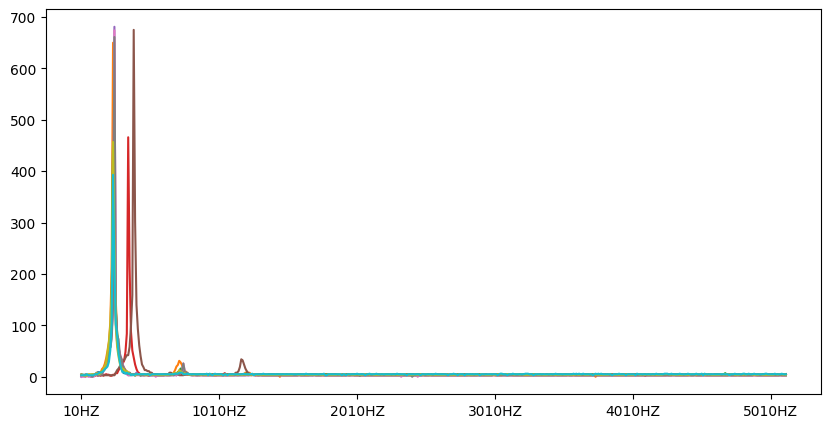

In [68]:
df1.loc[lowest_indices,'10HZ':'5120HZ'].transpose().plot(figsize=(10, 5), legend=False)

<Axes: >

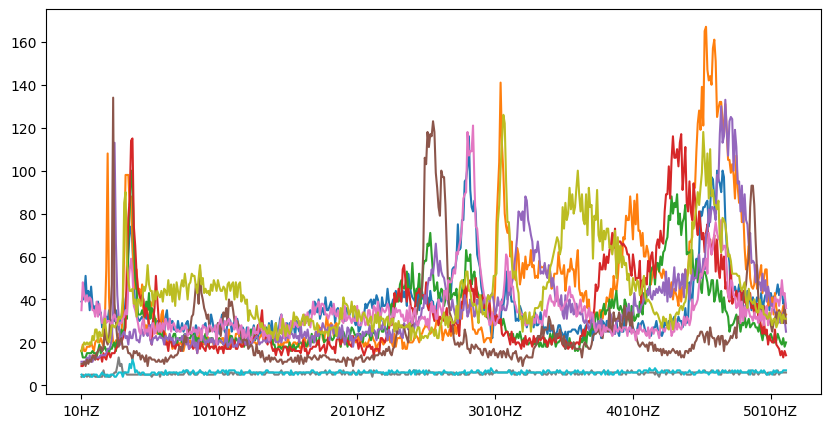

In [69]:
df1.loc[highest_indices,'10HZ':'5120HZ'].transpose().plot(figsize=(10, 5), legend=False)